# Order Cancellation Prediction
In this Chapter, I am going to do one of a supervised learning in Machine Learning Projects. I am going to build a machine that will be able to classifies which order is going to be cancelled by the characteristics of the order itself. The benefits of this projects for business process is as follows:
1. Help product manager to set a lower limit for general stocks based on number of cancellation predicted
2. Reduce cost specifically in marketing and customer services in terms of time, focus, and energy.
3. Improve Customer Services Quality

Here are the steps that I took in finishing this Classification Projects :
1. Data Cleaning
    - Creating Target Feature : "cancellation_list"
    - Create Dummies Variable for K-Means Cluster
2. EDA (Minor)
    - Cancellation Proportion on Datasets
3. Model Deployment
    - Data Preparation :
    - Data Splitting
    - Fitting Model with train data and Predicting Model with Test Data
    - Model Visualization and Evaluation :
4. Model Optimization :
    - Handling Imbalance Data with Oversampling (SMOTE) and undersampling (NearMiss)
    - Hyperparameter Tuning (RandomizedSearchCV)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E-commerce_data_after_clustering.csv")
data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,Group 4
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,6,1.85,17850,United Kingdom,11.10,Group 4
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047,United Kingdom,54.08,Group 4
3,536368,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,22960,JAM MAKING SET WITH JARS,6,4.25,13047,United Kingdom,25.50,Group 4
4,536369,2010-12-01 08:35:00,2010-12-01,2010,12,3,8,1,21756,BATH BUILDING BLOCK WORD,3,5.95,13047,United Kingdom,17.85,Group 4


In [29]:
len(data)

22190

In [3]:
data[(data['InvoiceNo'].str.contains('C'))]

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster
16,C536379,2010-12-01 09:41:00,2010-12-01,2010,12,3,9,1,D,Discount,-1,27.50,14527,United Kingdom,-27.50,Outlier
18,C536383,2010-12-01 09:49:00,2010-12-01,2010,12,3,9,1,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311,United Kingdom,-4.65,Outlier
26,C536391,2010-12-01 10:24:00,2010-12-01,2010,12,3,10,1,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548,United Kingdom,-19.80,Outlier
62,C536506,2010-12-01 12:38:00,2010-12-01,2010,12,3,12,1,22960,JAM MAKING SET WITH JARS,-6,4.25,17897,United Kingdom,-25.50,Group 3
87,C536543,2010-12-01 14:30:00,2010-12-01,2010,12,3,14,1,22632,HAND WARMER RED RETROSPOT,-1,2.10,17841,United Kingdom,-2.10,Group 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22153,C581484,2011-12-09 09:27:00,2011-12-09,2011,12,5,9,9,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,16446,United Kingdom,-168469.60,Outlier
22159,C581490,2011-12-09 09:57:00,2011-12-09,2011,12,5,9,9,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,1.95,14397,United Kingdom,-23.40,Outlier
22165,C581499,2011-12-09 10:28:00,2011-12-09,2011,12,5,10,9,M,Manual,-1,224.69,15498,United Kingdom,-224.69,Outlier
22174,C581568,2011-12-09 11:57:00,2011-12-09,2011,12,5,11,9,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311,United Kingdom,-54.75,Outlier


## Section 1 : Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InvoiceNo        22190 non-null  object 
 1   InvoiceDate      22190 non-null  object 
 2   Date             22190 non-null  object 
 3   Years            22190 non-null  int64  
 4   Months           22190 non-null  int64  
 5   Days             22190 non-null  int64  
 6   Hours            22190 non-null  int64  
 7   DayOfMonth       22190 non-null  int64  
 8   StockCode        22190 non-null  object 
 9   Description      22190 non-null  object 
 10  Quantity         22190 non-null  int64  
 11  UnitPrice        22190 non-null  float64
 12  CustomerID       22190 non-null  int64  
 13  Country          22190 non-null  object 
 14  TotalCost        22190 non-null  float64
 15  K-Means_Cluster  22190 non-null  object 
dtypes: float64(2), int64(7), object(7)
memory usage: 2.7+ MB


In [5]:
data.head(3)

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,Group 4
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,6,1.85,17850,United Kingdom,11.10,Group 4
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047,United Kingdom,54.08,Group 4


### Cleaning 01 : Creating Target Feature : "cancellation_list"

In [6]:
cancellation_list = []
for i in data['InvoiceNo'] :
    if "C" in i :
        cancellation_list.append(1)
    else :
        cancellation_list.append(0)
data['cancellation_list'] = cancellation_list
data.head(3)

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,K-Means_Cluster,cancellation_list
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,Group 4,0
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,6,1.85,17850,United Kingdom,11.10,Group 4,0
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047,United Kingdom,54.08,Group 4,0


### Cleaning 02 : Create Dummies Variable for K-Means Cluster

In [7]:
cluster_dummies = pd.get_dummies(data['K-Means_Cluster'], prefix = 'Cluster')
frames = [data, cluster_dummies]
data_pred = pd.concat(frames, axis=1)
data_pred.head(3)

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,...,CustomerID,Country,TotalCost,K-Means_Cluster,cancellation_list,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4,Cluster_Outlier
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,...,17850,United Kingdom,15.30,Group 4,0,0,0,0,1,0
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,...,17850,United Kingdom,11.10,Group 4,0,0,0,0,1,0
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,...,13047,United Kingdom,54.08,Group 4,0,0,0,0,1,0


## Section 2 :  Minor EDA

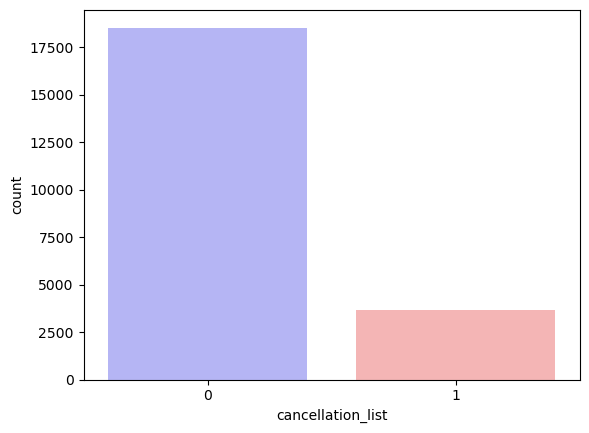

In [8]:
sns.countplot(x='cancellation_list', data = data, palette='bwr')
plt.show()

**DESCRIPTION :** 

0 : Not Cancel

1 : Cancel

It seems that there is an imbalance issues, but let's try the conventional way and see the result, I will do Imbalance Handling if the model performance is bad

In [9]:
countNoCancel = len(data[data['cancellation_list'] == 0])
countCancel = len(data[data['cancellation_list'] == 1])
print("percentage of not-cancelled Order : {:.2f}%".format((countNoCancel / (len(data['cancellation_list']))*100)))
print("percentage of cancelled order : {:.2f}%".format((countCancel / (len(data['cancellation_list']))*100)))

percentage of not-cancelled Order : 83.53%
percentage of cancelled order : 16.47%


In [10]:
countCancel

3654

In [11]:
data_pred.columns

Index(['InvoiceNo', 'InvoiceDate', 'Date', 'Years', 'Months', 'Days', 'Hours',
       'DayOfMonth', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'TotalCost', 'K-Means_Cluster',
       'cancellation_list', 'Cluster_Group 1', 'Cluster_Group 2',
       'Cluster_Group 3', 'Cluster_Group 4', 'Cluster_Outlier'],
      dtype='object')

In [12]:
data_pred

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,...,CustomerID,Country,TotalCost,K-Means_Cluster,cancellation_list,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4,Cluster_Outlier
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,...,17850,United Kingdom,15.30,Group 4,0,0,0,0,1,0
1,536366,2010-12-01 08:28:00,2010-12-01,2010,12,3,8,1,22633,HAND WARMER UNION JACK,...,17850,United Kingdom,11.10,Group 4,0,0,0,0,1,0
2,536367,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,84879,ASSORTED COLOUR BIRD ORNAMENT,...,13047,United Kingdom,54.08,Group 4,0,0,0,0,1,0
3,536368,2010-12-01 08:34:00,2010-12-01,2010,12,3,8,1,22960,JAM MAKING SET WITH JARS,...,13047,United Kingdom,25.50,Group 4,0,0,0,0,1,0
4,536369,2010-12-01 08:35:00,2010-12-01,2010,12,3,8,1,21756,BATH BUILDING BLOCK WORD,...,13047,United Kingdom,17.85,Group 4,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22185,581583,2011-12-09 12:23:00,2011-12-09,2011,12,5,12,9,20725,LUNCH BAG RED RETROSPOT,...,13777,United Kingdom,58.00,Outlier,0,0,0,0,0,1
22186,581584,2011-12-09 12:25:00,2011-12-09,2011,12,5,12,9,20832,RED FLOCK LOVE HEART PHOTO FRAME,...,13777,United Kingdom,51.84,Outlier,0,0,0,0,0,1
22187,581585,2011-12-09 12:31:00,2011-12-09,2011,12,5,12,9,22481,BLACK TEA TOWEL CLASSIC DESIGN,...,15804,United Kingdom,4.68,Outlier,0,0,0,0,0,1
22188,581586,2011-12-09 12:49:00,2011-12-09,2011,12,5,12,9,22061,LARGE CAKE STAND HANGING STRAWBERY,...,13113,United Kingdom,23.60,Outlier,0,0,0,0,0,1


## Section 3 : Model Deployment
Here are the key step that i took in Model Deployment:
1. Data Preparation :
    - data_pred_full : using all numerical data from the dataset
    - data_pred : using all numerical data from dataset except for Quantity and Total Cost (because these feature causes overfitting later on in the projects.
2. Data Splitting
    - Splitting Feature and Target Variable
    - Splitting train and test dataset
3. Fitting Model with train data and Predicting Model with Test Data
    - In this Model Fitting i am using RandomForestClassifier
4. Model Visualization and Evaluation :
    - Confusion Matrix
    - Classification Report
5. Model Selection

### 1. Data Preparation

In [13]:
#data_pred_full : all numerical data from the dataset
data_pred_full = data_pred[['cancellation_list','Months', 'Days', 'Hours', 'DayOfMonth',
                       'UnitPrice','Quantity','TotalCost','Cluster_Group 1', 'Cluster_Group 2', 
                       'Cluster_Group 3', 'Cluster_Group 4']]
data_pred_full.head()

,cancellation_list,Months,Days,Hours,DayOfMonth,UnitPrice,Quantity,TotalCost,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4
0,0,12,3,8,1,2.55,6,15.30,0,0,0,1
1,0,12,3,8,1,1.85,6,11.10,0,0,0,1
2,0,12,3,8,1,1.69,32,54.08,0,0,0,1
3,0,12,3,8,1,4.25,6,25.50,0,0,0,1
4,0,12,3,8,1,5.95,3,17.85,0,0,0,1


In [14]:
#data_pred : all numerical data from dataset except Quantity and TotalCost
data_pred = data_pred[['cancellation_list','Months', 'Days', 'Hours', 'DayOfMonth',
                       'UnitPrice', 'Cluster_Group 1', 'Cluster_Group 2', 
                       'Cluster_Group 3', 'Cluster_Group 4']]
data_pred.head()

,cancellation_list,Months,Days,Hours,DayOfMonth,UnitPrice,Cluster_Group 1,Cluster_Group 2,Cluster_Group 3,Cluster_Group 4
0,0,12,3,8,1,2.55,0,0,0,1
1,0,12,3,8,1,1.85,0,0,0,1
2,0,12,3,8,1,1.69,0,0,0,1
3,0,12,3,8,1,4.25,0,0,0,1
4,0,12,3,8,1,5.95,0,0,0,1


### 2. Data Splitting

In [15]:
#Splitting Feature and Target Variable for data_prep dataset
x = data_pred.drop(['cancellation_list'], axis=1)
y = data_pred['cancellation_list'].values

In [16]:
#Splitting Feature and target variable for data_prep_full dataset
x_2 = data_pred_full.drop(['cancellation_list'], axis=1)
y_2 = data_pred_full['cancellation_list'].values

In [17]:
#Splitting Train and Test data for both data_prep and data_prep dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_2train, x_2test, y_2train, y_2test = train_test_split(x_2, y_2, test_size=0.2, random_state=0)

### 3. Fitting and Predicting Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Fitting model with train data from data_prep and data_prep_full
model_RF = RandomForestClassifier(n_estimators = 1000, max_depth = 10)
model_RF.fit(x_train, y_train)
model_RF.fit(x_2train, y_2train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [20]:
#Predicting Model from data_prep_full
y_pred_RF= model_RF.predict(x_2test)

In [21]:
#Predicting Model from data_prep
model_RF = RandomForestClassifier(n_estimators = 1000, max_depth = 10)
model_RF.fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_test)

### 4. Model Visualization and Evaluation

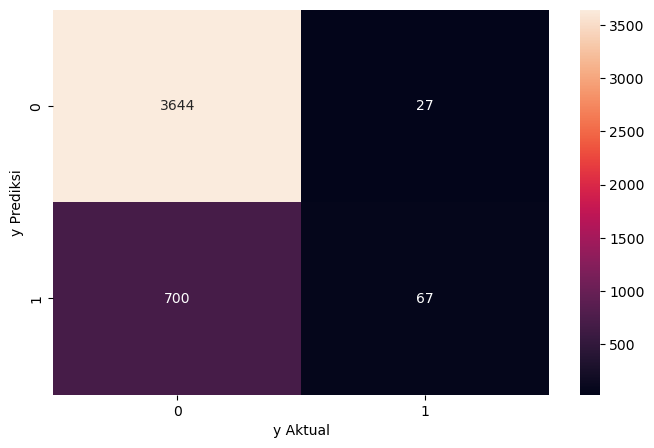

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3671
           1       0.71      0.09      0.16       767

    accuracy                           0.84      4438
   macro avg       0.78      0.54      0.53      4438
weighted avg       0.82      0.84      0.78      4438

0.8361874718341595


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

confusion_matrix(y_test, y_pred_RF) 

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title('')
plt.show()

# Confusion Matrix Report
print(classification_report(y_test, y_pred_RF))
print(accuracy_score(y_test,y_pred_RF))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [24]:
gbm_classifier = GradientBoostingClassifier()

In [25]:
gbm_classifier.fit(x_train, y_train)
gbm_classifier.fit(x_2train, y_2train)


GradientBoostingClassifier()

In [26]:
y_pred= gbm_classifier.predict(x_2test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


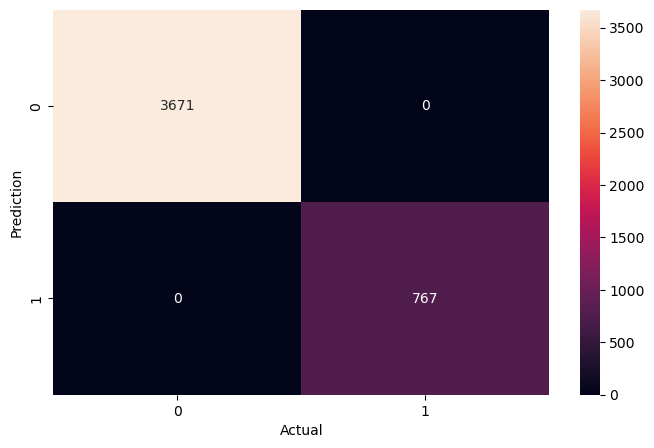

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3671
           1       1.00      1.00      1.00       767

    accuracy                           1.00      4438
   macro avg       1.00      1.00      1.00      4438
weighted avg       1.00      1.00      1.00      4438



In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

confusion_matrix(y_test, y_pred) 
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title('')
plt.show()

print(classification_report(y_test, y_pred))